In [104]:
from sklearn import datasets
import numpy as np 

features=2
centers=2
X, y = datasets.make_blobs(500, 2, centers=centers, random_state=501, cluster_std=3)

In [105]:
print("centers={}".format(np.unique(y)))
print("X shape={}".format(X.shape))

centers=[0 1]
X shape=(500, 2)


In [106]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh import colors 


In [120]:
output_notebook()

p = figure(plot_width=800, plot_height=400, 
               title='Bayesian', 
               x_axis_label='x', y_axis_label='y')
clr = colors.named.bisque
for cen in range(centers):
    p.circle(X[y==cen, 0], X[y==cen, 1], color=clr, legend="{}".format(cen))
    clr = clr.darken(.15)
show(p)

Loading BokehJS ...

In [109]:
from sklearn import model_selection as ms
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1)

In [113]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()
model_naive.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [117]:
model_naive.score(X_test[0:5,:], y_test[0:5])

1.0

In [119]:
print("Probability of class A and B")
model_naive.predict_proba(X_test).round(2)

Probability of class A and B


array([[0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.9 , 0.1 ],
       [0.07, 0.93],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.54, 0.46],
       [0.86, 0.14],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.89, 0.11],
       [0.81, 0.19],
       [0.99, 0.01],
       [0.87, 0.13],
       [0.  , 1.  ],
       [0.87, 0.13],
       [0.01, 0.99],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  ,

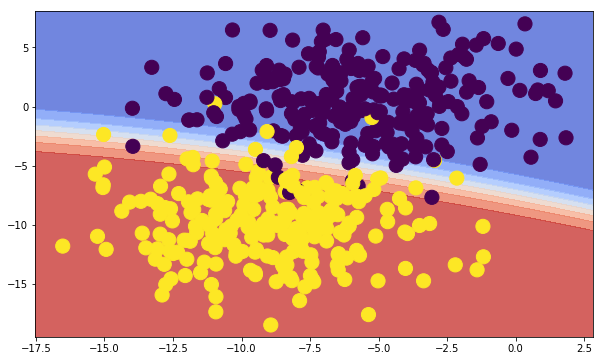

In [126]:
import matplotlib.pyplot as plt 
def plot_proba(model, X_test, y_test):
    """Probability contour plot """
    # https://stackoverflow.com/questions/33533047/how-to-make-a-contour-plot-in-python-using-bokeh-or-other-libs
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.column_stack((xx.ravel().astype(np.float32),
                              yy.ravel().astype(np.float32)))
    if hasattr(model, 'predictProb'):
        _, _, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)
    
    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)
    
plt.figure(figsize=(10, 6))
plot_proba(model_naive, X, y)